In [2]:
#data wrangling
import pandas as pd
import numpy as np

#datetime
import datetime as dt

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên

transactions = pd.read_excel('C:\\Users\\Binh\\OneDrive\\Tài liệu\\KPMG_Milestone_Project\\KPMG/KPMG.xlsx', 0)

transactions.head(5)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [19]:
# in ra info bảng
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [24]:
# describe default
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [25]:
# describe các biến object
transactions[['order_status', 'brand', 'product_line', 'product_class', 'product_size']].describe()

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [26]:
# count số dòng bị null ở mỗi cột
{col: list(pd.isna(transactions[col])).count(True) for col in transactions.columns}

{'transaction_id': 0,
 'product_id': 0,
 'customer_id': 0,
 'transaction_date': 0,
 'online_order': 360,
 'order_status': 0,
 'brand': 197,
 'product_line': 197,
 'product_class': 197,
 'product_size': 197,
 'list_price': 0,
 'standard_cost': 197,
 'product_first_sold_date': 197}

# 1. Data Correction

## 1.1 Drop NA

In [27]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = transactions.dropna()
df_dropna_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [28]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = transactions.dropna(subset=['online_order'])
df_dropna_online_order.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [29]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = transactions.fillna(0)
df_fillna_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [30]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = transactions.fillna(method="ffill")
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [31]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = transactions.fillna(method = 'bfill')
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3.Assess Categorical Data

In [34]:
# load sheet Demographic và hiển thị 5 dòng đầu tiên
demographic = pd.read_excel('C:\\Users\\Binh\\OneDrive\\Tài liệu\\KPMG_Milestone_Project\\KPMG/KPMG.xlsx', 2)

demographic.head()

C:\Users\Binh\AppData\Local\Temp\ipykernel_5604\4147197902.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic = pd.read_excel('C:\\Users\\Binh\\OneDrive\\Tài liệu\\KPMG_Milestone_Project\\KPMG/KPMG.xlsx', 2)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [37]:
# in ra info bảng
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [38]:
# describe các giá trị object
demographic[['job_title','job_industry_category','wealth_segment','deceased_indicator','default','owns_car' ]].describe()


,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,3494,3344,4000,4000,3698,4000
unique,195,9,3,2,90,2
top,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,45,799,2000,3998,113,2024


In [40]:
# Remove all NA rows, then use output for the following steps
demographic_dropna = demographic.dropna()
demographic_dropna.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [41]:
# In ra các giá trị unique của cột gender
demographic['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [42]:
# Quy chuẩn cột gender về các nhóm Male, Female, Unisex và in ra giá trị unique mới
demographic['gender'] = demographic['gender'].replace(['F', 'U', 'Femal', 'M'],['Female','Unisex','Female', 'Male'])
demographic['gender'].unique()

array(['Female', 'Male', 'Unisex'], dtype=object)

In [43]:
# Tính tuổi của mỗi khách hàng, lưu vào cột "age" và in ra min age, max age
# today = dt.date.today()
# demographic['age'] = now - demographic['DOB']
# demographic.head()

now = pd.Timestamp('now')
demographic['DOB'] = pd.to_datetime(demographic['DOB'], format='%m%d%y')  
demographic['DOB'] = demographic['DOB'].where(demographic['DOB'] < now, demographic['DOB'] -  np.timedelta64(100, 'Y'))
demographic['age'] = (now - demographic['DOB']).astype('<m8[Y]')
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,69.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0


In [44]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut

demographic['age_group'] = pd.cut(x=demographic['age'], bins=[0,35, 55, 100], labels=['Young', 'Middle', 'Older'], right=False)
demographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,Older
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42.0,Middle
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,69.0,Older
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61.0,Older
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0,Middle


# 2.Data Completeness

In [45]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)


tong_hop = pd.merge(df_dropna_all, demographic_dropna, on = 'customer_id', how='left')
miss_demo_info = tong_hop[tong_hop['first_name'].isna() | tong_hop['last_name'].isna()]
miss_demo_info.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,5,1986,2017-01-17,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,79,2426,2017-04-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,89,2822,2017-06-11,0.0,Approved,WeareA2B,Touring,medium,large,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,26,64,2596,2017-01-10,0.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,31,88,2810,2017-09-05,1.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,33,25,1272,2017-03-20,0.0,Approved,Giant Bicycles,Road,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,42,79,3398,2017-05-14,0.0,Approved,Solex,Touring,medium,large,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45,55,2787,2017-06-07,1.0,Approved,Trek Bicycles,Road,medium,large,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation (after dropping null values)

In [46]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
tong_hop['customer_id'].nunique()

3492

In [47]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
tong_hop['year_month'] = tong_hop['transaction_date'].dt.strftime("%Y%m")
tong_hop[['transaction_id','year_month']].groupby('year_month').nunique()
#or tong_hop[['transaction_id','year_month']].groupby('year_month').count()
#or tong_hop[['transaction_id','year_month']].groupby('year_month').agg({'transaction_id':'count'})

,transaction_id
year_month,
201701,1634
201702,1578
201703,1597
201704,1613
201705,1641
201706,1537
201707,1670
201708,1703
201709,1534


In [48]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
tong_hop['gross_margin'] = tong_hop['list_price'] - tong_hop['standard_cost']
tong_hop[['gross_margin','year_month']].groupby('year_month').agg({'gross_margin':'sum'})

,gross_margin
year_month,
201701,915151.359988
201702,852514.230000
201703,865312.550000
201704,888856.890000
201705,904003.210000
201706,841815.260000
201707,919677.790000
201708,951376.270000
201709,843736.130000


In [50]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg

tong_hop[['online_order','order_status','list_price']].groupby(['online_order','order_status']).agg({'online_order':'count','list_price':'sum'})

online_order   list_price
online_order order_status                           
0.0          Approved              9631  10666230.05
             Cancelled               75     86837.88
1.0          Approved              9642  10670179.59
             Cancelled               97    108924.20

# 4. Data Visualization

In [51]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
# Comment insight/message muốn truyền tải thông qua từng chart

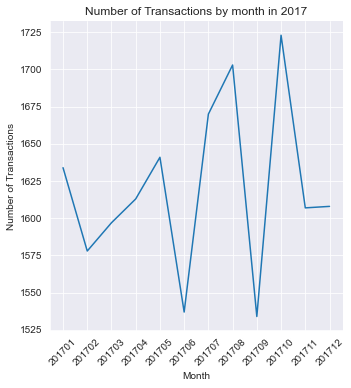

In [65]:
sns.set_style('darkgrid')
sns.relplot(x='year_month',y='transaction_id', data = tong_hop[['transaction_id','year_month']].groupby('year_month').nunique(), kind = 'line')
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by month in 2017')
plt.show()

October is the month that has the biggest number of transactions, followed by August

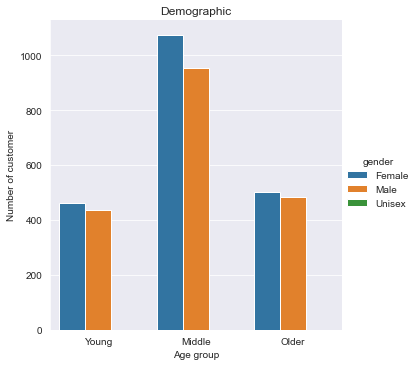

In [70]:
sns.catplot(x= 'age_group', data = demographic, kind ='count', hue = 'gender')
plt.title('Demographic')
plt.xlabel('Age group')
plt.ylabel('Number of customer')
plt.show()

In general, there are more Female customers than male at each age group

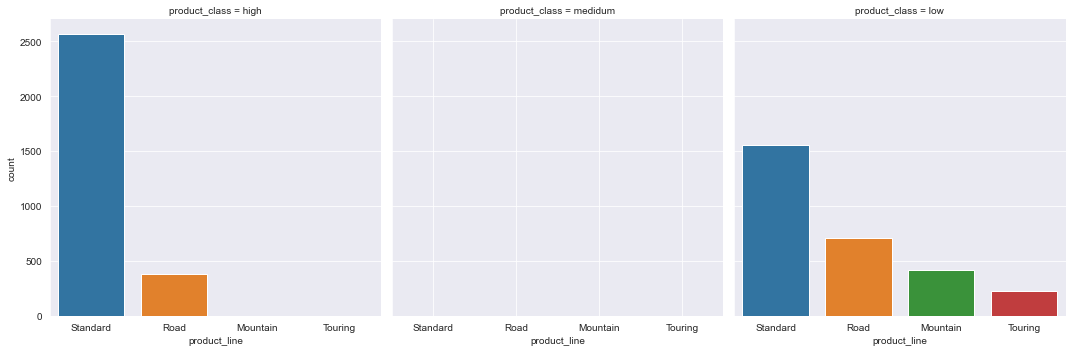

In [72]:
sns.catplot(x= 'product_line', data= tong_hop, kind = 'count', col = 'product_class', col_order = ['high','medidum','low'])
plt.show()

With standard product line, customers consider between high and low class, while with other lines, they tend to buy low class products